In [ ]:
# only run this cell if you are in collab
!pip install ohmeow-blurr
!pip install nlp

     |████████████████████████████████| 194kB 6.4MB/s 
     |████████████████████████████████| 675kB 8.5MB/s 
     |████████████████████████████████| 3.8MB 17.5MB/s 
     |████████████████████████████████| 1.1MB 27.9MB/s 
     |████████████████████████████████| 890kB 43.5MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=afceab0220e51357df5fa466a44b248f2452247450d40e6ce12a608eccb7ac96
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=400051753dfddf7bd6d8216edf1c085c9be6992aeb428edd51a7c8d5eddcc7dc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses
     |████████████████████████████████| 860kB 2.8MB/s 
     |████████████████████████████████| 63.8MB 44kB/s 
  Found existing installation: pyarrow 0.14.1


In [ ]:
import pandas as pd
from fastai2.text.all import *
from transformers import *
import torch

from blurr.data.all import *

from blurr.modeling.all import *

In [ ]:
path = "/content/drive/My Drive/semester 11/cse465/Project/dataset/LATEST/train.pt"
df = torch.load(path)

In [ ]:
df.head()

,Abstract,Body
34616,"We present three data driven model-types for COVID-19 with a minimal number of parameters to provide insights into the spread of the disease that may be used for developing policy responses. The first is exponential growth, widely studied in analysis of early-time data. The second is a self-exciting branching process model which includes a delay in transmission and recovery. It allows for meaningful fit to early time stochastic data. The third is the well-known Susceptible-Infected-Resistant (SIR) model and its cousin, SEIR, with an ""Exposed"" component. All three models are related quantit...","The world is in the midst of an ongoing pandemic, caused by the emergence of a novel coronavirus. Pharmaceutical interventions such as vaccination and anti-viral drugs are not currently available. In the short run, addressing the COVID-19 outbreak will depend critically on the successful implementation of public health measures including social distancing, workplace modifications, disease surveillance, contact tracing, isolation, and quarantine. \n\n On March 16th, Imperial College London released a report predicting dire consequences if the US and UK did not swiftly take action. In respo..."
10388,Un bref descriptif des attitudes et représentations d'une patientèle de psychiatrie libérale parisienne relative à la pandémie SARS-CoV-2. Les données recueillies auprès de nos patients laissent entendre qu'ils ont accueilli la mesure de confinement de façon positive. Sa fin a été l'occasion d'un sursaut d'angoisse pour beaucoup. L'image du Covid-19 et celle du corps de l'autre ont eu tendance à se confondre. Une certaine perplexité relative aux mesures préventives a été observée.,"Notre cabinet parisien a continué de fonctionner pendant toute la durée du confinement. La moitié des patients se sont absentés durant cette période et les autres ont maintenu le contact, principalement par téléconsultation. Le nombre de nouveaux patients a été très réduit. Nous décrivons ici les attitudes de nos patients devant l'épidémie ainsi que les représentations qu'ils ont pu développer de cette dernière dans le contexte du confinement. \n\n Il a été généralement bien observé, la plupart des patients disant le tolérer bien et profitant selon L'attitude générale, pour les adultes act..."
27709,"Endophytes are the group of microorganisms that reside to internal and healthy tissues without causing negative symptoms to their host plant. Endophytes are extremely diverse and range from fungi, bacteria and actinomycetes. Development of drug resistance to pathogenic forms of bacteria, fungi and other microbes, emergence of lethal viruses, the perpetuating epidemics in developing and under developing countries, and multifold fungal infection, enhancement in human population globally, all shows our inability to overcome these biomedical problems. In addition to this, we are also unable to...","Originally, the term endophyte was introduced by de Bary ( 1866 ) and was assigned to all those microbes that reside inside the living healthy tissues of the plants. Later, this term was expanded as fungi and bacteria including actinomycetes, which spend the whole or at least a part of their life cycle colonizing inter-or intra-cellularly, inside the healthy living tissue of the host plant, typically causing no apparent symptoms of disease. Many workers defi ne the endophytes in different ways, but Bacon and White ( 2000 ) gave a conclusive and widely accepted defi nition of endophyte as '..."
29449,"Studies of proteinaceous cysteine protease inhibitors originated with the discovery of cystatins in the 1960s. Since that time, a rich and fascinating world of proteins that control and regulate a multitude of important physiological processes, ranging from the basics of protein turnover to development and brain function, has been uncovered. Failures in such important and complex systems inevitably lead to pathologies. Many threatening diseases such as cancer

In [ ]:
print(len(df))
print(df.shape)

41506
(41506, 2)


In [ ]:
# from sklearn.model_selection import train_test_split
# train, test= train_test_split(df, test_size=0.10, random_state=42)
# # train_df = df.loc[0:8500]
# # test_df = df.loc[8501:]

In [ ]:
# print(len(train))
# print(len(test))

41506
4612


In [ ]:
# torch.save(train,"/content/drive/My Drive/semester 11/cse465/Project/dataset/LATEST/train.pt")
# torch.save(test,"/content/drive/My Drive/semester 11/cse465/Project/dataset/LATEST/test.pt")

In [ ]:
pretrained_model_name = "bart-large-cnn"
hf_arch, hf_tokenizer, hf_config, hf_model = \
    BLURR_MODEL_HELPER.get_hf_objects(pretrained_model_name, BartTokenizer, HF_MODELS.BartForConditionalGeneration)
hf_arch, type(hf_tokenizer), type(hf_config), type(hf_model)

('bart',
 transformers.tokenization_bart.BartTokenizer,
 transformers.configuration_bart.BartConfig,
 transformers.modeling_bart.BartForConditionalGeneration)

In [ ]:
blocks = ( 
    HF_TextBlock(hf_arch, hf_tokenizer), 
    HF_TextBlock(hf_arch, hf_tokenizer, task=ForConditionalGenerationTask())
)

dblock = DataBlock(blocks=blocks, 
                   get_x=ColReader('Body'), 
                   get_y=ColReader('Abstract'), 
                   splitter=RandomSubsetSplitter(0.05, 0.01))

In [ ]:
dls = dblock.dataloaders(df, bs=4)

In [ ]:
# a = dls.one_batch()
# len(a[0]), a[0][0].shape,a[1].shape

(4, torch.Size([4, 512]), torch.Size([4, 300]))

In [ ]:
b = dls.one_batch()
len(b), b[0][0].shape, b[1].shape

(2, torch.Size([4, 512]), torch.Size([4, 512]))

In [ ]:
dls.show_batch(hf_tokenizer=hf_tokenizer, max_n=2)

,text,target
0,"The research protocol described here follows directly from a recently completed NCCAM-funded study (1R01AT004313) in which we randomized n=154 people to 3 groups: 1) 8-weeks of training in mindfulness meditation, 2) matched 8-weeks of training in exercise, or 3) wait list control. A total of 94 participants were randomized in September 2009, and 60 more in January 2010. Only 5 withdrew early, with 149 followed through May 2010. There were 27 ARI episodes and 257 days of ARI illness in the meditation group (n=51) and 26 episodes and 241 ARI illness days for exercise (n=47), compared to 40 episodes and 453 ARI illness days for the control group (n=51). Mean area-under-curve global severity was 144 for meditation, 248 for exercise, and 358 for control. Comparing meditation to control, one-sided T-test yielded P=0.034 for illness days and p=0.0042 for global severity. Comparing exercise to control, corresponding p-values were 0.032 for illness days and 0.16 for global severity. Adjusting for covariates with zero-inflated multivariate regression models, both total days of illness (p=0.033) and global severity (p=0.010) appeared to be lower for meditation, but not for exercise (p = 0.47 and p=0.31, respectively). There were 16 ARI-related health care visits and 67 sick days lost to work in the control group, compared to 15 visits and 32 sick days for exercise and 10 visits and 16 sick days for meditation. Multiplex polymerase chain reaction (PCR) confirmed virus in 19 of the control episodes, 14 for meditation, and 8 for exercise. The only 2 cases of confirmed influenza were in the control group. Neutrophil counts and interleukin-8 (IL-8) assays provided corroborating evidence that observed benefits were unlikely to be due to biased-self-report biases. 1 \n\nTo the best of our knowledge, the preliminary research described above is the first randomized trial to assess potential influences of mindfulness meditation on ARI illness, and the first to use a validated outcome measure to assess effects of exercise on ARI illness. It is also the first to compare both meditation and exercise to a valid control group, allowing head-to-head comparative effectiveness assessment. The proposed work is also innovative in terms","Lactogenic immunity transferred to piglets after inoculation of a live vaccine to pregnant sows was proved limited to control porcine epidemic diarrhea (PED). Hence, here we evaluated the efficacy of administration of a probiotic compound containing Bacillus mesentericus, Clostridium butyricum, and Enterococcus faecalis together with a commercial live-attenuated PED vaccine (Nisseiken PED Live Vaccine, Nisseiken, Tokyo, Japan) to improve the health and reproductive performance of PED-infected sows. Twenty pregnant sows in a PED-positive farm were equally divided into probiotics-administered (VP) and control (VC) sow groups. A commercial live-attenuated vaccine was injected as per the manufacturer's instruction. The probiotic compound (15 g/day) was orally administered to VP from 6 weeks pre-parturition to 7 days post-parturition (ppd7). VP had a significantly higher body weight at ppd7 than VC (191 vs 186 kg; P < 0.05). At day 3 post-parturition (ppd3) (4.18 vs 3.63 kg/day) and ppd7 (5.14 vs 4.34 kg/day), milk produced by VP was significantly (P < 0.05) greater than that by VC. Total immunoglobulin (Ig)A and IgG concentrations at day 0 were significantly (P < 0.05) higher in whey of VP (1.9 and 6.6 g/dL, respectively) than in that of VC (1.7 and 6.1 g/dL, respectively). However, total IgG concentration in whey of VP and VC at ppd3 and ppd7 did not differ. Antibody titer was significantly higher at day 0 in serum of VP than it was that of VC (60 vs 37 in geometric mean; P < 0.05). Likewise, the antibody titer in whey of VP and VC was found to be similar at day 0 (416 vs 208 in geometric mean; P = 0.13). Consequently, VP had fewer days between weaning and return to estrus than did VC (7 vs 10 days; P < 0.05). 

In [ ]:
hf_model

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): LearnedPositionalEmbedding(1026, 1024, padding_idx=1)
      (layers): ModuleList(
        (0): EncoderLayer(
          (self_attn): SelfAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=Tr

In [ ]:
model = HF_TextGenerationModelWrapper(hf_model)

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(ignore_index=hf_tokenizer.pad_token_id),
                cbs=[HF_BaseModelCallback],
                splitter=partial(text_gen_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze_to(3)

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=1.3182567499825382e-06)

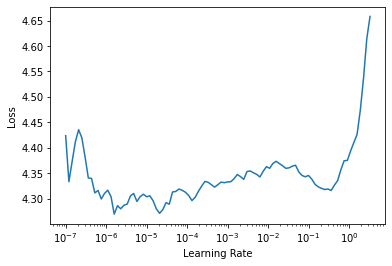

In [ ]:
learn.lr_find(suggestions=True)

In [ ]:
# b = dls.one_batch()
# preds = learn.model(b[0])
# len(b), len(b[0]), b[0][0].shape, len(b[1]), b[1].shape, len(preds), preds[0].shape

In [ ]:
learn.fit(3,lr=3e-5)

epoch,train_loss,valid_loss,time
0,2.791651,2.712018,1:17:40
1,2.628802,2.653870,1:29:57
2,2.354951,2.649674,1:31:33


In [ ]:
learn.save("/content/drive/My Drive/semester 11/cse465/Project/dataset/models/covid-19")

In [ ]:
learn.export("/content/drive/My Drive/semester 11/cse465/Project/dataset/models/covid-19.pkl")

In [ ]:
print( learn.show_results(hf_tokenizer=hf_tokenizer, max_n=2))

,text,target,prediction
0,"Today there is a fast growing number of nucleic acid-based strategies to modulate a vast variety of cellular functions (for a review see: ). Several classes of oligonucleotides like aptamers, transcription factor-binding decoy oligonucleotides, ribozymes, triplex-forming oligonucleotides (TFO), immunostimulatory CpG motifs, antisense oligonucleotides including peptide nucleic acids (PNAs), small interfering RNAs (siRNAs) and antagomirs have attained much interest as a research tool owing to their highly specific mode of action. Even more important, these oligomeric nucleic acids do have a considerable potential to be used as therapeutics. Figure 1 provides an overview of such oligonucleotides and their target sites within the cell. Aptamers, small oligonucleotides derived from an in vitro evolution process called SELEX, can virtually be targeted to any given extra-or intracellular structure. Oligonucleotides containing a CpG motif interact with toll-like receptor 9 (TLR9) and trigger an immunostimulatory response. Antisense and decoy oligonucleotides as well as siRNAs can modulate gene expression by interacting with RNA or proteins either in the cytoplasm or in the nucleus. TFOs are directed against genomic DNA and, like plasmids, have to reach the nucleus to exert their biological effect.\n\nAlthough quite different in their mode of action, oligomeric nucleic acids have several features in common. Essentially, they can either be rationally designed (e.g. antisense oligonucleotides or siRNAs) or selected in vitro (e.g. aptamers or ribozymes). These are major advantages compared to traditional small molecule drug screening approaches. In general, these macromolecules show remarkably high specificity for their targets accompanied by low probability of generating side-effects. Additionally, nucleic acids are virtually non-immunogenic compared to protein-or peptide-based approaches. On the downside, considerations like stability, bio-availability and pharmacokinetics come into play. Though, these drawbacks can be resolved by appropriate chemical modifications. Nuclease resistance for instance can be achieved by alkyl modifications at the 2'-position of the ribose. In recent years, valuable progress has been accomplished through the development of novel chemically modified nucle","Background: Should an emerging infectious disease outbreak or an environmental disaster occur, the collection of epidemiological data must start as soon as possible after the event's onset. Questionnaires are usually built de novo for each event, resulting in substantially delayed epidemiological responses that are detrimental to the understanding and control of the event considered. Moreover, the public health and/or academic institution databases constructed with responses to different questionnaires are usually difficult to merge, impairing necessary collaborations. We aimed to show that e-commerce concepts and software tools can be readily adapted to enable rapid collection of data after an infectious disease outbreak or environmental disaster. Here, the 'customers' are the epidemiologists, who fill their shopping 'baskets' with standardised questions. Methods: For each epidemiological field, a catalogue of questions is constituted by identifying the relevant variables based on a review of the published literature on similar circumstances. Each question is tagged with information on its source papers. Epidemiologists can then tailor their own questionnaires by choosing appropriate questions from this catalogue. The software immediately provides them with ready-to-use forms and online questionnaires. All databases constituted by the different EpiBasket users are interoperable, because the corresponding questionnaires are derived from the same corpus of questions. Results: A proof-of-concept prototype was developed for Knowledge, Attitudes and Practice (KAP) surveys, which is one of the fields of the epidemiological investigat

None


In [ ]:
test_article = """
Today there is a fast growing number of nucleic acid-based strategies to modulate a vast variety of cellular functions (for a review see: ). Several classes of oligonucleotides like aptamers, transcription factor-binding decoy oligonucleotides, ribozymes, triplex-forming oligonucleotides (TFO), immunostimulatory CpG motifs, antisense oligonucleotides including peptide nucleic acids (PNAs), small interfering RNAs (siRNAs) and antagomirs have attained much interest as a research tool owing to their highly specific mode of action. Even more important, these oligomeric nucleic acids do have a considerable potential to be used as therapeutics. Figure 1 provides an overview of such oligonucleotides and their target sites within the cell. Aptamers, small oligonucleotides derived from an in vitro evolution process called SELEX, can virtually be targeted to any given extra-or intracellular structure. Oligonucleotides containing a CpG motif interact with toll-like receptor 9 (TLR9) and trigger an immunostimulatory response. Antisense and decoy oligonucleotides as well as siRNAs can modulate gene expression by interacting with RNA or proteins either in the cytoplasm or in the nucleus. TFOs are directed against genomic DNA and, like plasmids, have to reach the nucleus to exert their biological effect.\n\nAlthough quite different in their mode of action, oligomeric nucleic acids have several features in common. Essentially, they can either be rationally designed (e.g. antisense oligonucleotides or siRNAs) or selected in vitro (e.g. aptamers or ribozymes). These are major advantages compared to traditional small molecule drug screening approaches. In general, these macromolecules show remarkably high specificity for their targets accompanied by low probability of generating side-effects. Additionally, nucleic acids are virtually non-immunogenic compared to protein-or peptide-based approaches. On the downside, considerations like stability, bio-availability and pharmacokinetics come into play.
"""

In [ ]:
# outputs = learn.generate_text(test_article, early_stopping=True, num_beams=4, num_return_sequences=3)

# for idx, o in enumerate(outputs):
#     print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
 Background: Although quite different in their mode of action, oligomeric nucleic acids have several features in common. Essentially, they can either be rationally designed (e.g. antisense oligonucleotides or siRNAs) or selected in vitro. These are major advantages compared to traditional small molecule drug screening approaches. On the downside, considerations like stability, bio-availability and pharmacokinetics come into play.

=== Prediction 2 ===
 Although quite different in their mode of action, oligomeric nucleic acids have several features in common. Essentially, they can either be rationally designed (e.g. antisense oligonucleotides or siRNAs) or selected in vitro. These are major advantages compared to traditional small molecule drug screening approaches. On the downside, considerations like stability, bio-availability and pharmacokinetics come into play.

=== Prediction 3 ===
 Background: Although quite different in their mode of action, oligomeric nucle

## ***Inference ***

In [ ]:
learn = load_learner("/content/drive/My Drive/semester 11/cse465/Project/dataset/models/covid-19.pkl")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'transformers.modeling_bart.BartForConditionalGeneration' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [ ]:
# learn.generate_text(test_article)

[' Aptamers, small oligonucleotides derived from an in vitro evolution process called SELEX, can virtually be targeted to any given extra-or intracellular structure. Oligomeric nucleic acids containing a CpG motif interact with toll-like receptor 9 (TLR9) and trigger an immunostimulatory response. Antisense and decoy oligon nucleotides as well as siRNAs can modulate gene expression by interacting with RNA or proteins either in the cytoplasm or in the nucleus. TFOs are directed against genomic DNA and, like plasmids,']

In [ ]:
df_test = torch.load("/content/drive/My Drive/semester 11/cse465/Project/dataset/LATEST/test.pt")

In [ ]:
df_test.head()

,Abstract,Body
14125,"Background: The spike glycoprotein (S) gene of the severe acute respiratory syndrome-associated coronavirus (SARS-CoV) has been useful in analyzing the molecular epidemiology of the 2003 SARS outbreaks. Objectives: To characterize complete SARS-CoV S-gene sequences from Hong Kong. Study design: Fifty-six SARS-CoV S-gene sequences, obtained from patients who presented with SARS to the Prince of Wales Hospital during March-May 2003, were analysed using a maximum likelihood (ML) approach, together with 138 other (both human and animal) S-gene sequences downloaded from GenBank. Results: The ma...","Since the severe acute respiratory syndrome (SARS) epidemic of 2003 around the world, many researchers have attempted to determine the natural reservoir of the SARS-associated coronavirus (SARS-CoV). Studies on the possible animal source of SARS-CoV have mainly focused on the Himalyan palm civet (Paguma larvata), though other animals (e.g. the raccoon dog, Nyctereutes procyonoides) have been shown to carry coronaviruses closely related to the SARS-CoV. Of note, these related animal coronaviruses possess a 29 base-pair sequence (position 27,869-27,897) in the 1386-6532/$ -see front matter ©..."
3401,"Influenza usually spreads through the human population in multiple-wave outbreaks. Successive reinfection of individuals over a short time interval has been explicitly reported during past pandemics. However, the causes of rapid reinfection and the role of reinfection in driving multiple-wave outbreaks remain poorly understood. To investigate these issues, we focus on a two-wave influenza A/H3N2 epidemic that occurred on the remote island of Tristan da Cunha in 1971. Over 59 days, 273 (96%) of 284 islanders experienced at least one attack and 92 (32%) experienced two attacks. We formulate ...","A swine-origin influenza A/H1N1 virus that arose in 2009 reminds us of the persistent risk of influenza pandemics. Lessons from the past are precious and may help us to anticipate and manage such potential disasters . The most striking example is certainly the 'Spanish' influenza pandemic of 1918 -1919 that occurred in three waves and caused about 50 million deaths worldwide in only nine months . To date, this multiple-wave outbreak pattern, which has also been reported during several other pandemic episodes, remains only partially understood. On one hand, there is evidence from the 2009..."
29313,"Touristic cities will suffer from COVID-19 emergency because of its economic impact on their communities. The first emergency phases involved a wide closure of such areas to support ""social distancing"" measures (i.e. travels limitation; lockdown of (over)crowd-prone activities). In the second phase, individual's risk-mitigation strategies (facial masks) could be properly linked to ""social distancing"" to ensure re-opening touristic cities to visitors. Simulation tools could support the effectiveness evaluation of risk-mitigation measures to look for an economic and social optimum for activi...","The smart adaptation of cities against different risks is one of the key challenges for their sustainability and the resilience of the hosted communities (C. Ribeiro and Pena Jardim Gonçalves, 2019) . Urban areas involved by tourists' flows represent a particular application context for such resilience issues, because of the complexity between economic, social (including relationships between tourists' and residents' needs) and organizational tasks, especially in those scenarios in which seasonal tourism is a training element for the community (Feleki et al., 2018; Qie and Rong, 2016; Stan..."
12609,"Background. Effective influenza surveillance requires new methods capable of rapid and inexpensive genomic analysis of evolving viral species for pandemic preparedness, to understand the evolution of circulating viral species, and for vaccine strain selection. We have developed one such approach based on previously described broad-range reverse 

In [ ]:
from tqdm import tqdm

In [ ]:
body = []
for i in tqdm(df_test['Body']):
  text = str(i)
  new = sent_detector.tokenize(text.strip())
  # print(len(new))
  if len(new) > 22:
    cut_new = new[:25]
    hello = ''.join(cut_new)
    body.append(hello)
    # print(hello)
    # print(learn.generate_text(hello))
    # print(len(cut_new))
  else:
    body.append(text)
  


100%|██████████| 4612/4612 [00:43<00:00, 106.37it/s]


In [ ]:
pred = []
for i in tqdm(body[:2000]):
  pred.append(learn.generate_text(i))



  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 1/2000 [00:58<32:29:15, 58.51s/it]

  0%|          | 2/2000 [01:50<31:23:20, 56.56s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (1347 > 1024). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
d = {'full':df_test['Body'], 'short':body, 'abstract':df_test['Abstract']}

In [ ]:
df = pd.DataFrame(data=d)

In [ ]:
torch.save(df,'/content/drive/My Drive/semester 11/cse465/Project/dataset/inference.pt')

In [ ]:
i = df_test['Body'][:1]
i

14125    Since the severe acute respiratory syndrome (SARS) epidemic of 2003 around the world, many researchers have attempted to determine the natural reservoir of the SARS-associated coronavirus (SARS-CoV). Studies on the possible animal source of SARS-CoV have mainly focused on the Himalyan palm civet (Paguma larvata), though other animals (e.g. the raccoon dog, Nyctereutes procyonoides) have been shown to carry coronaviruses closely related to the SARS-CoV. Of note, these related animal coronaviruses possess a 29 base-pair sequence (position 27,869-27,897) in the 1386-6532/$ -see front matter ©...
Name: Body, dtype: object